In [0]:
import pyspark


In [0]:
from pyspark.context import SparkContext

##CREATING RDDS

In [0]:
sc=SparkContext.getOrCreate() 

In [0]:
data=sc.textFile('/FileStore/tables/train.csv') 

In [0]:
data.cache()

Out[248]: /FileStore/tables/train.csv MapPartitionsRDD[180] at textFile at NativeMethodAccessorImpl.java:0

In [0]:
df=sc.parallelize('/FileStore/tables/train.csv') 

In [0]:
data.collect()

Out[250]: ['Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales',
 'FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138',
 'DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228',
 'FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27',
 'FDX07,19.2,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,,Tier 3,Grocery Store,732.38',
 'NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052',
 'FDP36,10.395,Regular,0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088',
 'FDO10,13.65,Regular,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528',
 'FDP10,,Low Fat,0.127469857,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Typ

In [0]:
data.cache()

Out[251]: /FileStore/tables/train.csv MapPartitionsRDD[180] at textFile at NativeMethodAccessorImpl.java:0

#TRANSFORMATION

In [0]:
str_re=data.map(lambda x: x.replace(',',''))

In [0]:
str_re.collect()

Out[253]: ['Item_IdentifierItem_WeightItem_Fat_ContentItem_VisibilityItem_TypeItem_MRPOutlet_IdentifierOutlet_Establishment_YearOutlet_SizeOutlet_Location_TypeOutlet_TypeItem_Outlet_Sales',
 'FDA159.3Low Fat0.016047301Dairy249.8092OUT0491999MediumTier 1Supermarket Type13735.138',
 'DRC015.92Regular0.019278216Soft Drinks48.2692OUT0182009MediumTier 3Supermarket Type2443.4228',
 'FDN1517.5Low Fat0.016760075Meat141.618OUT0491999MediumTier 1Supermarket Type12097.27',
 'FDX0719.2Regular0Fruits and Vegetables182.095OUT0101998Tier 3Grocery Store732.38',
 'NCD198.93Low Fat0Household53.8614OUT0131987HighTier 3Supermarket Type1994.7052',
 'FDP3610.395Regular0Baking Goods51.4008OUT0182009MediumTier 3Supermarket Type2556.6088',
 'FDO1013.65Regular0.012741089Snack Foods57.6588OUT0131987HighTier 3Supermarket Type1343.5528',
 'FDP10Low Fat0.127469857Snack Foods107.7622OUT0271985MediumTier 3Supermarket Type34022.7636',
 'FDH1716.2Regular0.016687114Frozen Foods96.9726OUT0452002Tier 2Supermarket Type1107

In [0]:
data.count()

Out[254]: 8524

In [0]:
data.take(10)

Out[255]: ['Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales',
 'FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138',
 'DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228',
 'FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27',
 'FDX07,19.2,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,,Tier 3,Grocery Store,732.38',
 'NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052',
 'FDP36,10.395,Regular,0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088',
 'FDO10,13.65,Regular,0.012741089,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528',
 'FDP10,,Low Fat,0.127469857,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Typ

In [0]:
find_supermarket=data.filter(lambda x: 'Grocery Store' in x)

In [0]:
find_supermarket.collect()

Out[257]: ['FDX07,19.2,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,,Tier 3,Grocery Store,732.38',
 'FDC37,,Low Fat,0.057556998,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876',
 'FDE51,5.925,Regular,0.161466534,Dairy,45.5086,OUT010,1998,,Tier 3,Grocery Store,178.4344',
 'FDC14,,Regular,0.072221801,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362',
 'FDV38,19.25,Low Fat,0.170348551,Dairy,55.7956,OUT010,1998,,Tier 3,Grocery Store,163.7868',
 'FDM39,6.42,LF,0.089498926,Dairy,178.1002,OUT010,1998,,Tier 3,Grocery Store,358.2004',
 'FDS02,,Regular,0.255394896,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176',
 'FDI26,,Low Fat,0.061082177,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.172',
 'FDY40,,Regular,0.15028599,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076',
 'FDC46,17.7,LF,0.195068226,Snack Foods,185.4266,OUT010,1998,,Tier 3,Grocery Store,184.4266',
 'FDN48,,Low Fat,0.113720344,Baking Goods,89

In [0]:
find_supermarket.count()

Out[258]: 1083

In [0]:
Count_Of_Total_Rdds=data.filter(lambda t: "Item_Identifier" not in t)

In [0]:
Count_Of_Total_Rdds.count() # This line is showing that we have 8523 RDD's.

Out[260]: 8523

d
#SHARED VARIABLE

In [0]:
count1=sc.accumulator(0)
count2=sc.accumulator(0)
fat=sc.broadcast('Low Fat')
fat1=sc.broadcast('Regular Fat')

In [0]:
def count_fat(data):
    global count1
    global count2
    if fat.value in data:
        count1+=1
    if fat1.value in data:
        count2+=1
    
count_Data=data.map(count_fat)
#count_Data.count()
print(count1,count2)

0 0


In [0]:

from pyspark.sql import SparkSession

In [0]:
from pyspark.sql import SQLContext

#SPARK SQL

In [0]:

df=spark.read.option('header','true').csv('/FileStore/tables/train.csv')

In [0]:
df.show(5) 

+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|           Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|
+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+
|          FDA15|        9.3|         Low Fat|    0.016047301|               Dairy|249.8092|           OUT049|                     1999|     Medium|              Tier 1|Supermarket Type1|         3735.138|
|          DRC01|       5.92|         Regular|    0.019278216|         Soft Drinks| 48.2692|           OUT018|                     2009|     Medium|              Tier 3|Superma

In [0]:
df.printSchema()

root
 |-- Item_Identifier: string (nullable = true)
 |-- Item_Weight: string (nullable = true)
 |-- Item_Fat_Content: string (nullable = true)
 |-- Item_Visibility: string (nullable = true)
 |-- Item_Type: string (nullable = true)
 |-- Item_MRP: string (nullable = true)
 |-- Outlet_Identifier: string (nullable = true)
 |-- Outlet_Establishment_Year: string (nullable = true)
 |-- Outlet_Size: string (nullable = true)
 |-- Outlet_Location_Type: string (nullable = true)
 |-- Outlet_Type: string (nullable = true)
 |-- Item_Outlet_Sales: string (nullable = true)



In [0]:
df.describe()

Out[268]: DataFrame[summary: string, Item_Identifier: string, Item_Weight: string, Item_Fat_Content: string, Item_Visibility: string, Item_Type: string, Item_MRP: string, Outlet_Identifier: string, Outlet_Establishment_Year: string, Outlet_Size: string, Outlet_Location_Type: string, Outlet_Type: string, Item_Outlet_Sales: string]

In [0]:
df.registerTempTable("store")

/databricks/spark/python/pyspark/sql/dataframe.py:146: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn(


In [0]:
view=spark.sql('select * from store')

In [0]:
view.show()

+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+
|Item_Identifier|Item_Weight|Item_Fat_Content|Item_Visibility|           Item_Type|Item_MRP|Outlet_Identifier|Outlet_Establishment_Year|Outlet_Size|Outlet_Location_Type|      Outlet_Type|Item_Outlet_Sales|
+---------------+-----------+----------------+---------------+--------------------+--------+-----------------+-------------------------+-----------+--------------------+-----------------+-----------------+
|          FDA15|        9.3|         Low Fat|    0.016047301|               Dairy|249.8092|           OUT049|                     1999|     Medium|              Tier 1|Supermarket Type1|         3735.138|
|          DRC01|       5.92|         Regular|    0.019278216|         Soft Drinks| 48.2692|           OUT018|                     2009|     Medium|              Tier 3|Superma

In [0]:
unique=spark.sql('SELECT COUNT (DISTINCT(*)) FROM store')

In [0]:
unique.show()# WE HAVE 4650

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|count(DISTINCT Item_Identifier, Item_Weight, Item_Fat_Content, Item_Visibility, Item_Type, Item_MRP, Outlet_Identifier, Outlet_Establishment_Year, Outlet_Size, Outlet_Location_Type, Outlet_Type, Item_Outlet_Sales)|
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|                                                                                                                                                                                                                 4650|
+---------------------------------------------------------------------------------------------------------------------------------------

In [0]:
outlet=spark.sql("SELECT Outlet_Size, COUNT(Outlet_Size) FROM store GROUP BY Outlet_Size")

In [0]:
outlet.show()

+-----------+------------------+
|Outlet_Size|count(Outlet_Size)|
+-----------+------------------+
|       High|               932|
|       null|                 0|
|     Medium|              2793|
|      Small|              2388|
+-----------+------------------+



In [0]:
item=spark.sql("SELECT Item_Type, COUNT(Item_Type) FROM store GROUP BY Item_Type")

In [0]:
item.show()

+--------------------+----------------+
|           Item_Type|count(Item_Type)|
+--------------------+----------------+
|       Starchy Foods|             148|
|        Baking Goods|             648|
|              Breads|             251|
|Fruits and Vegeta...|            1232|
|                Meat|             425|
|         Hard Drinks|             214|
|         Soft Drinks|             445|
|           Household|             910|
|           Breakfast|             110|
|               Dairy|             682|
|         Snack Foods|            1200|
|              Others|             169|
|             Seafood|              64|
|              Canned|             649|
|        Frozen Foods|             856|
|  Health and Hygiene|             520|
+--------------------+----------------+



In [0]:

Total_Sales=spark.sql("select sum(Item_Outlet_Sales) as Total_Sales from store")

In [0]:
Total_Sales.show()

+--------------------+
|         Total_Sales|
+--------------------+
|1.8591125410400037E7|
+--------------------+



#PANDAS

In [0]:
df1=df.toPandas()

In [0]:
df1.isnull().sum()

Out[281]: Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [0]:
df1.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060,8523,8523,8523,8523,8523,8523,6113,8523,8523,8523
unique,1559,415,5,7880,16,5938,10,9,3,3,4,3493
top,FDG33,12.15,Low Fat,0,Fruits and Vegetables,172.0422,OUT027,1985,Medium,Tier 3,Supermarket Type1,958.752
freq,10,86,5089,526,1232,7,935,1463,2793,3350,5577,17


In [0]:
df1

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138
1,DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.27
3,FDX07,19.2,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,None,Tier 3,Grocery Store,732.38
4,NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783389,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.38,Regular,0.046982429,Baking Goods,108.157,OUT045,2002,None,Tier 2,Supermarket Type1,549.285
8520,NCJ29,10.6,Low Fat,0.035186271,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.21,Regular,0.145220646,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [0]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Item_Identifier            8523 non-null   object
 1   Item_Weight                7060 non-null   object
 2   Item_Fat_Content           8523 non-null   object
 3   Item_Visibility            8523 non-null   object
 4   Item_Type                  8523 non-null   object
 5   Item_MRP                   8523 non-null   object
 6   Outlet_Identifier          8523 non-null   object
 7   Outlet_Establishment_Year  8523 non-null   object
 8   Outlet_Size                6113 non-null   object
 9   Outlet_Location_Type       8523 non-null   object
 10  Outlet_Type                8523 non-null   object
 11  Item_Outlet_Sales          8523 non-null   object
dtypes: object(12)
memory usage: 799.2+ KB


In [0]:
df1['Outlet_Size'] = df1['Outlet_Size'].fillna('NA') # WE HAVE LOT OF NULLS IN THIS COLUMNS. SO WE REPLACE NULLS WITH NA TO GET BETTER PREDICTION

In [0]:
df1.isnull().sum()

Out[286]: Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [0]:
import seaborn as sns

##CHECKING NULL VALUES

Out[288]: <AxesSubplot:>

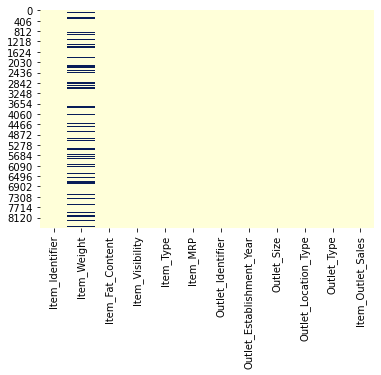

In [0]:

sns.heatmap(df1.isnull(), cbar=False, cmap="YlGnBu") # AS YOU CAN SEE ALL VALUES HAS BEEN DROPPED

#EXPLORATORY DATA ANALYSIS

In [0]:
df1.groupby('Item_Fat_Content', as_index=False)['Item_Identifier'].count()

,Item_Fat_Content,Item_Identifier
0,LF,316
1,Low Fat,5089
2,Regular,2889
3,low fat,112
4,reg,117


Out[290]: <AxesSubplot:xlabel='Item_Fat_Content', ylabel='Count'>

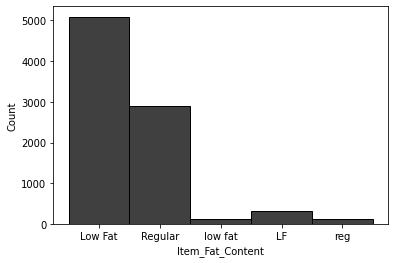

In [0]:
sns.histplot(data=df1['Item_Fat_Content'],color='black')

In [0]:
# CHECKING THE SALES OF EACH ITEM_FAT_CONTENT
df1[['Item_Fat_Content','Item_Outlet_Sales']].groupby('Item_Fat_Content').aggregate({'Item_Outlet_Sales':'sum'})


,Item_Outlet_Sales
Item_Fat_Content,
LF,358.2004184.42662085.9514585.23823630.6074133....
Low Fat,3735.1382097.27994.70524022.76361516.02661977....
Regular,443.4228732.38556.6088343.55281076.59864710.53...
low fat,308.93125580.73564693.89679.1162732.44321379.5...
reg,1427.47521794.3315359.692870.92963707.174437.9...


Out[292]: <AxesSubplot:>

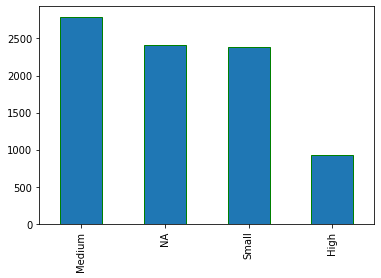

In [0]:
#COUNT THE STORE TYPE
df1['Outlet_Size'].value_counts().plot(kind='bar',edgecolor='green')

Out[293]: <AxesSubplot:>

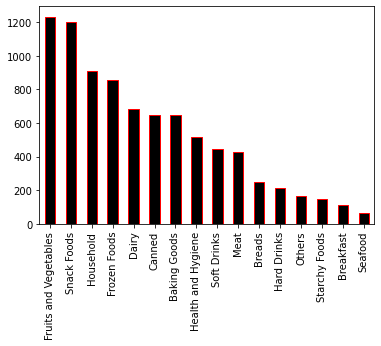

In [0]:
# COUNT THE PRODUCTS
df1['Item_Type'].value_counts().plot(kind='bar',edgecolor='red',color='black')

In [0]:
df1['Item_Outlet_Sales']=df1['Item_Outlet_Sales'].astype('float')

In [0]:
df1['Item_Outlet_Sales']=df1['Item_Outlet_Sales'].astype('int')

In [0]:
#REVENUE GENERATED BY EACH ITEM
df1[['Item_Type','Item_Outlet_Sales']].groupby('Item_Type').aggregate({'Item_Outlet_Sales':'sum'}) 

,Item_Outlet_Sales
Item_Type,
Baking Goods,1265198
Breads,553105
Breakfast,232245
Canned,1443824
Dairy,1522268
Frozen Foods,1825296
Fruits and Vegetables,2819435
Hard Drinks,457685
Health and Hygiene,1044938


In [0]:
#REVENUE GENERATED BY EACH OUTLET
df1[['Outlet_Size','Item_Outlet_Sales']].groupby('Outlet_Size').aggregate({'Item_Outlet_Sales':'sum'}) 

,Item_Outlet_Sales
Outlet_Size,
High,2142201
Medium,7488298
NA,4391331
Small,4565014


/databricks/python/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
Out[298]: <AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

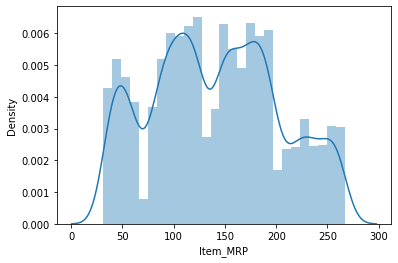

In [0]:
 sns.distplot(df1['Item_MRP'])

Out[299]: <AxesSubplot:>

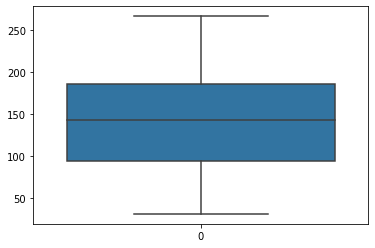

In [0]:
sns.boxplot(data=df1['Item_MRP'])

/databricks/python/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
Out[300]: <AxesSubplot:xlabel='Item_Outlet_Sales'>

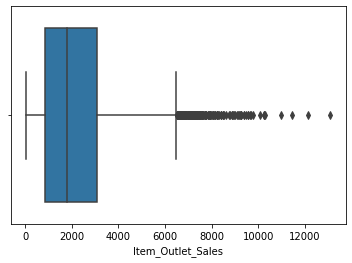

In [0]:
#AS YOU CAN SEE THERE ARE OUTLIERS IN THIS COLUMNS
sns.boxplot(df1['Item_Outlet_Sales'])
# BUT WE WILL NOT REMOVE THIS.BEACUSE OUTLET SALES CAN BE 12000 OR MORE IN SOME MONTHS.

In [0]:
df1[['Outlet_Establishment_Year','Item_Outlet_Sales']].groupby('Outlet_Establishment_Year').aggregate({'Item_Outlet_Sales':'sum'}) 

,Item_Outlet_Sales
Outlet_Establishment_Year,
1985,3632878
1987,2142201
1997,2117930
1998,188061
1999,2183490
2002,2036261
2004,2267660
2007,2167009
2009,1851354


In [0]:
final_data=df1

In [0]:
final_data.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735
1,DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443
2,FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097
3,FDX07,19.2,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,NA,Tier 3,Grocery Store,732
4,NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994


In [0]:
final_data['Item_Outlet_Sales']=final_data['Item_Outlet_Sales'].astype('float')

In [0]:
final_data['Item_Outlet_Sales']=final_data['Item_Outlet_Sales'].astype('int')

In [0]:
final_data[['Outlet_Type','Item_Outlet_Sales']].groupby('Outlet_Type').aggregate({'Item_Outlet_Sales':'sum'})

,Item_Outlet_Sales
Outlet_Type,
Grocery Store,367485
Supermarket Type1,12914551
Supermarket Type2,1851354
Supermarket Type3,3453454


In [0]:
final_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047301,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735
1,DRC01,5.92,Regular,0.019278216,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443
2,FDN15,17.5,Low Fat,0.016760075,Meat,141.618,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097
3,FDX07,19.2,Regular,0,Fruits and Vegetables,182.095,OUT010,1998,NA,Tier 3,Grocery Store,732
4,NCD19,8.93,Low Fat,0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783389,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778
8519,FDS36,8.38,Regular,0.046982429,Baking Goods,108.157,OUT045,2002,NA,Tier 2,Supermarket Type1,549
8520,NCJ29,10.6,Low Fat,0.035186271,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193
8521,FDN46,7.21,Regular,0.145220646,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845


In [0]:
df1=df1.drop(columns=['Outlet_Establishment_Year', 'Item_Identifier', 'Outlet_Identifier'],axis=1)

In [0]:
final_data=df1

In [0]:
final_data.columns

Out[310]: Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

## CONVERT CATEGORICAL INTO 0 OR 1

In [0]:
final_data_=pd.get_dummies(final_data[['Item_Type','Outlet_Type']],drop_first=True)

In [0]:
final_data_

,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
8519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
8520,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
8521,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [0]:
final_data.columns

Out[313]: Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

In [0]:
final_data=pd.concat([final_data,final_data_],axis=1)

In [0]:
final_data=final_data.drop(columns=['Item_Fat_Content','Item_Type','Outlet_Type'])

In [0]:
final_data=final_data.drop(columns=['Outlet_Size','Outlet_Location_Type'],axis=1)

In [0]:
final_data.head(5) # FINAL DATA FRAME IN WHICH APPLYING ML
final_data=final_data.drop(columns=['Item_Visibility'],axis=1)

In [0]:
final_data=final_data.astype('float')

In [0]:
final_data['Item_MRP']=final_data['Item_MRP'].astype('int')

In [0]:
final_data.head(5)

,Item_Weight,Item_MRP,Item_Outlet_Sales,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,249,3735.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,5.92,48,443.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,17.50,141,2097.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,19.20,182,732.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.93,53,994.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

#STATISTICAL ANALYSIS

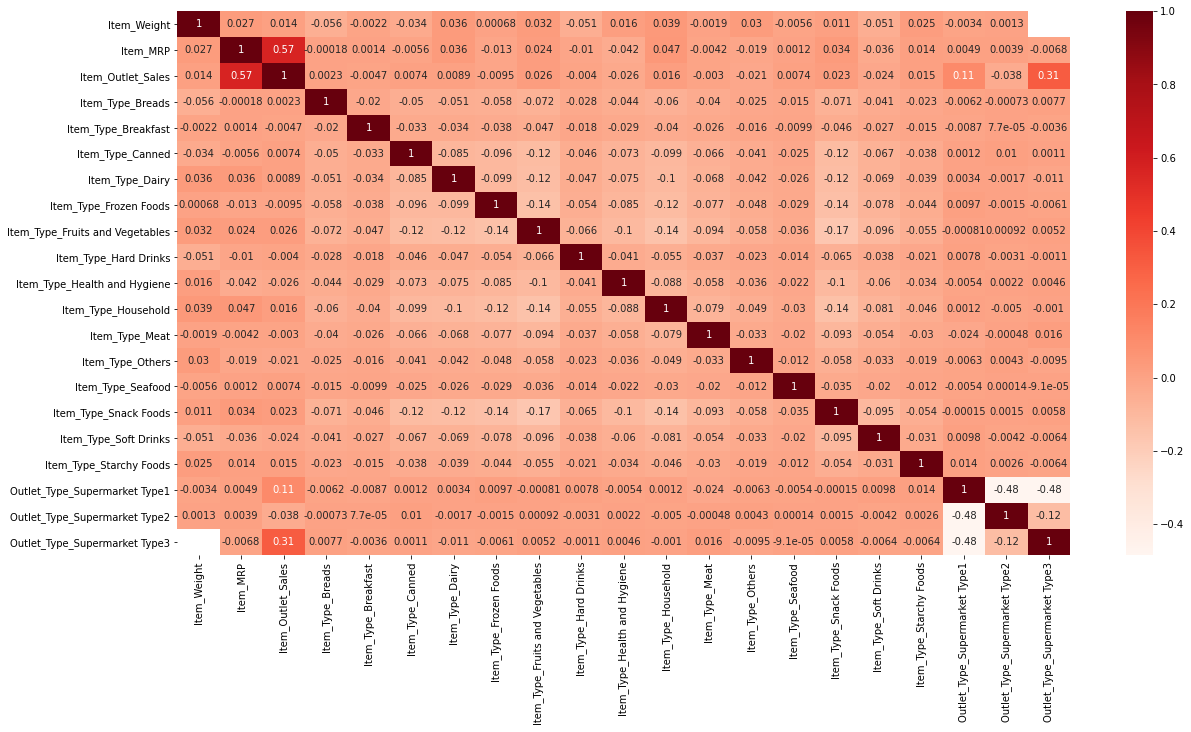

In [0]:
plt.figure(figsize=(20,10))
cor = final_data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [0]:
final_data['Item_Outlet_Sales']=final_data['Item_Outlet_Sales'].astype('int')

In [0]:
final_data['Item_Weight']=final_data['Item_Weight'].fillna(0)

In [0]:
final_data['Item_Weight']=final_data['Item_Weight'].astype('int')

In [0]:
final_data.mean()

Out[323]: Item_Weight                          12.857645
Item_MRP                            140.494662
Item_Outlet_Sales                  2180.786577
Item_Type_Breads                      0.029450
Item_Type_Breakfast                   0.012906
Item_Type_Canned                      0.076147
Item_Type_Dairy                       0.080019
Item_Type_Frozen Foods                0.100434
Item_Type_Fruits and Vegetables       0.144550
Item_Type_Hard Drinks                 0.025109
Item_Type_Health and Hygiene          0.061011
Item_Type_Household                   0.106770
Item_Type_Meat                        0.049865
Item_Type_Others                      0.019829
Item_Type_Seafood                     0.007509
Item_Type_Snack Foods                 0.140795
Item_Type_Soft Drinks                 0.052212
Item_Type_Starchy Foods               0.017365
Outlet_Type_Supermarket Type1         0.654347
Outlet_Type_Supermarket Type2         0.108882
Outlet_Type_Supermarket Type3         0.109703
dty

In [0]:
final_data.std()

Out[324]: Item_Weight                           4.643456
Item_MRP                             62.275275
Item_Outlet_Sales                  1706.497259
Item_Type_Breads                      0.169073
Item_Type_Breakfast                   0.112877
Item_Type_Canned                      0.265249
Item_Type_Dairy                       0.271338
Item_Type_Frozen Foods                0.300596
Item_Type_Fruits and Vegetables       0.351667
Item_Type_Hard Drinks                 0.156464
Item_Type_Health and Hygiene          0.239365
Item_Type_Household                   0.308839
Item_Type_Meat                        0.217679
Item_Type_Others                      0.139420
Item_Type_Seafood                     0.086334
Item_Type_Snack Foods                 0.347831
Item_Type_Soft Drinks                 0.222467
Item_Type_Starchy Foods               0.130634
Outlet_Type_Supermarket Type1         0.475609
Outlet_Type_Supermarket Type2         0.311509
Outlet_Type_Supermarket Type3         0.312538
dty

In [0]:
final_data.min()

Out[325]: Item_Weight                         4.555
Item_MRP                           31.000
Item_Outlet_Sales                  33.000
Item_Type_Breads                    0.000
Item_Type_Breakfast                 0.000
Item_Type_Canned                    0.000
Item_Type_Dairy                     0.000
Item_Type_Frozen Foods              0.000
Item_Type_Fruits and Vegetables     0.000
Item_Type_Hard Drinks               0.000
Item_Type_Health and Hygiene        0.000
Item_Type_Household                 0.000
Item_Type_Meat                      0.000
Item_Type_Others                    0.000
Item_Type_Seafood                   0.000
Item_Type_Snack Foods               0.000
Item_Type_Soft Drinks               0.000
Item_Type_Starchy Foods             0.000
Outlet_Type_Supermarket Type1       0.000
Outlet_Type_Supermarket Type2       0.000
Outlet_Type_Supermarket Type3       0.000
dtype: float64

In [0]:
# THE REASON WHY AM CONVERTING INTO SQL DATAFRAME AAIN BECAUSE SPARK ML DOES NOT WORK WITH PANDAS DATAFRAME.
spark_dff = sqlContext.createDataFrame(final_data)

In [0]:
spark_dff.show(5)

+-----------+--------+-----------------+----------------+-------------------+----------------+---------------+----------------------+-------------------------------+---------------------+----------------------------+-------------------+--------------+----------------+-----------------+---------------------+---------------------+-----------------------+-----------------------------+-----------------------------+-----------------------------+
|Item_Weight|Item_MRP|Item_Outlet_Sales|Item_Type_Breads|Item_Type_Breakfast|Item_Type_Canned|Item_Type_Dairy|Item_Type_Frozen Foods|Item_Type_Fruits and Vegetables|Item_Type_Hard Drinks|Item_Type_Health and Hygiene|Item_Type_Household|Item_Type_Meat|Item_Type_Others|Item_Type_Seafood|Item_Type_Snack Foods|Item_Type_Soft Drinks|Item_Type_Starchy Foods|Outlet_Type_Supermarket Type1|Outlet_Type_Supermarket Type2|Outlet_Type_Supermarket Type3|
+-----------+--------+-----------------+----------------+-------------------+----------------+---------------+

#SPARK ML

In [0]:
from pyspark.ml.feature import VectorAssembler
# BEFORE USING SPARKML IT IS COMPULSORY TO CONVERT YOUR DATAFRAME INTO DENSE VECTOR. WITHOUT CONVERTING INTO DENSE VECTOR ALGORITHM WILL NOT WORK.
# DENSE VECTOR JUST CONVERT THAT COLUMNS INTO POINTS. THAT'S ALL


In [0]:
required_features=['Item_Weight', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
       'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2',
       'Outlet_Type_Supermarket Type3']

In [0]:
assembler = VectorAssembler(inputCols=required_features, outputCol='features')


In [0]:
transformed_data = assembler.transform(spark_dff)

In [0]:
transformed_data.show(5)

+-----------+--------+-----------------+----------------+-------------------+----------------+---------------+----------------------+-------------------------------+---------------------+----------------------------+-------------------+--------------+----------------+-----------------+---------------------+---------------------+-----------------------+-----------------------------+-----------------------------+-----------------------------+--------------------+
|Item_Weight|Item_MRP|Item_Outlet_Sales|Item_Type_Breads|Item_Type_Breakfast|Item_Type_Canned|Item_Type_Dairy|Item_Type_Frozen Foods|Item_Type_Fruits and Vegetables|Item_Type_Hard Drinks|Item_Type_Health and Hygiene|Item_Type_Household|Item_Type_Meat|Item_Type_Others|Item_Type_Seafood|Item_Type_Snack Foods|Item_Type_Soft Drinks|Item_Type_Starchy Foods|Outlet_Type_Supermarket Type1|Outlet_Type_Supermarket Type2|Outlet_Type_Supermarket Type3|            features|
+-----------+--------+-----------------+----------------+-----------

In [0]:
(training_data, test_data) = transformed_data.randomSplit([0.8,0.2])

In [0]:
from pyspark.ml.regression import LinearRegression


#LINEAR REGRESSION

In [0]:
Lr = LinearRegression(labelCol='Item_Outlet_Sales', 
                            featuresCol='features',maxIter=10)


In [0]:
model = Lr.fit(training_data)

In [0]:
predictions = model.transform(test_data)

In [0]:
predictions.select("features","Item_Outlet_Sales","prediction").show(5)

+--------------------+-----------------+----------+
|            features|Item_Outlet_Sales|prediction|
+--------------------+-----------------+----------+
|(21,[1,2,7],[37.0...|               37|      37.0|
|(21,[1,2,7],[41.0...|               41|      41.0|
|(21,[1,2,8,20],[4...|             2187|    2187.0|
|(21,[1,2,4],[49.0...|               50|      50.0|
|(21,[1,2,10,20],[...|              241|     241.0|
+--------------------+-----------------+----------+
only showing top 5 rows



In [0]:

from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [0]:
evaluator = MulticlassClassificationEvaluator(
    labelCol='Item_Outlet_Sales', 
    predictionCol='prediction', 
    metricName='accuracy')

In [0]:
accuracy = evaluator.evaluate(predictions)
print('Test Accuracy = ', accuracy)

Test Accuracy =  1.0


#DECISION TREE

In [0]:
from pyspark.ml.regression import DecisionTreeRegressor


In [0]:
dt = DecisionTreeRegressor(featuresCol='features',labelCol='Item_Outlet_Sales')


In [0]:
modell=dt.fit(training_data)

In [0]:
pred=modell.transform(test_data)

In [0]:
pred.select('prediction').show(5)

+------------------+
|        prediction|
+------------------+
|140.40281030444964|
|140.40281030444964|
|2127.7033492822966|
|140.40281030444964|
| 274.2122641509434|
+------------------+
only showing top 5 rows



In [0]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator


In [0]:
evaluator = MulticlassClassificationEvaluator(
    labelCol='Item_Outlet_Sales', 
    predictionCol='prediction', 
    metricName='accuracy')

In [0]:
accuracy = evaluator.evaluate(predictions)
print('Test Accuracy = ', accuracy)

Test Accuracy =  1.0


In [0]:
#spark_dff.coalesce(1).write.format("com.databricks.spark.csv").option("header", "true").save("dbfs:/FileStore/model/clean_data.csv")